# Introduccion

El análisis y la visualización de características no solo proporcionan una comprensión más profunda de los datos, sino que también son fundamentales para garantizar la calidad y eficacia de los modelos predictivos, así como para comunicar resultados de manera efectiva.

# Configuracion Inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos en el cuaderno
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Cargar el dataset entrenamiento limpio
train_df = pd.read_csv('../data/clean_train.csv')

In [3]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_Size,IsAlone
0,0,3,0,22.0,7.2500,0,0,1,2,0
1,1,1,1,38.0,71.2833,1,0,0,2,0
2,1,3,1,26.0,7.9250,0,0,1,1,1
3,1,1,1,35.0,53.1000,0,0,1,2,0
4,0,3,0,35.0,8.0500,0,0,1,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked_C   891 non-null    int64  
 6   Embarked_Q   891 non-null    int64  
 7   Embarked_S   891 non-null    int64  
 8   Family_Size  891 non-null    int64  
 9   IsAlone      891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


# Analisis Caracteristicas y Visualizacion

## Sobrevivientes

In [5]:
print("Distribución de sobrevivientes:")
print(train_df['Survived'].value_counts())

print("\nDistribución de sobrevivientes (porcentaje):")
print(train_df['Survived'].value_counts(normalize=True) * 100)

Distribución de sobrevivientes:
Survived
0    549
1    342
Name: count, dtype: int64

Distribución de sobrevivientes (porcentaje):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


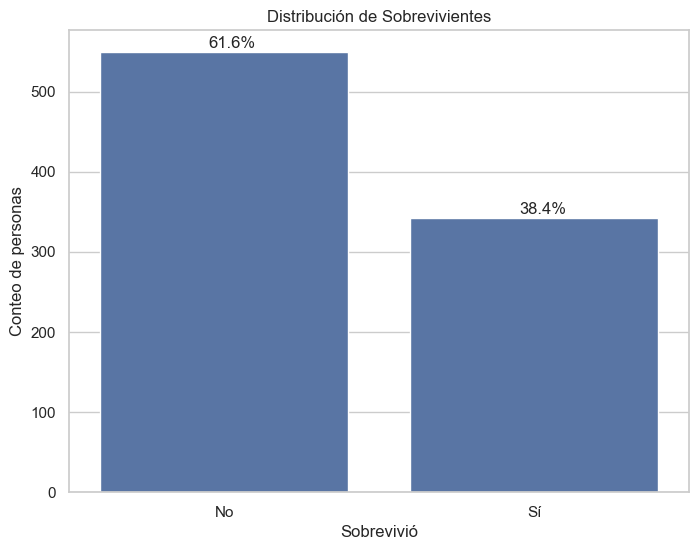

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=train_df)

# Calcular los porcentajes
total = len(train_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), size = 12)

# Títulos y etiquetas
plt.title('Distribución de Sobrevivientes')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo de personas')
plt.xticks([0, 1], ['No', 'Sí'])

plt.show()

## Clase vs Supervivencia

In [7]:
print("\nConteo de Clase:")
print(train_df['Pclass'].value_counts())

print("\nPorcentaje de Clase:")
print(train_df['Pclass'].value_counts(normalize=True)*100)


Conteo de Clase:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Porcentaje de Clase:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


**Recordemos que**

1. Alta
2. Media
3. Baja

*Tiene sentido que la mayoria de personas sean de clase baja representando mas del 50%, debido a factores como costo,clase social,etc*

In [8]:
# Tabla cruzada sobre supervivencia y Tipo de Clase
print(pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True))

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


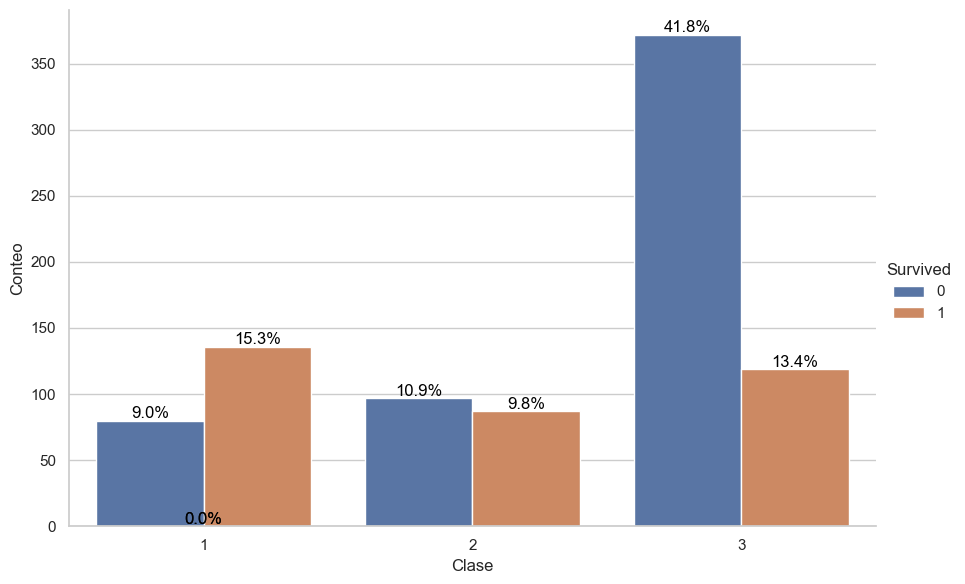

In [9]:
g = sns.catplot(x='Pclass', hue='Survived', kind='count', data=train_df, height=6, aspect=1.5)

# Calcular los porcentajes y anotarlos en las barras
total = len(train_df)
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Configurar título y etiquetas
g.set_titles('Clase vs Supervivencia')
g.set_axis_labels('Clase', 'Conteo')

# Mostrar la gráfica
plt.show()

Se puede ver de manera efectiva cómo la clase socioeconómica influyó en la probabilidad de supervivencia de los pasajeros del Titanic. Estadisticamente se tenia una mayor probabilidad de supervivencia siendo pasajero de primera clase.

## Genero vs Supervivencia

In [10]:
print("Cantidad de hombres y mujeres")
print(train_df['Sex'].value_counts())

print("\nPorcentaje de hombres y mujeres\n")
print(train_df['Sex'].value_counts(normalize=True) * 100)

Cantidad de hombres y mujeres
Sex
0    577
1    314
Name: count, dtype: int64

Porcentaje de hombres y mujeres

Sex
0    64.758698
1    35.241302
Name: proportion, dtype: float64


**Recordemos que:**

0. Hombre(male)
1. Mujer(female)

In [11]:
# Tabla cruzada de genero y supervivencia
print(pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True))

Survived    0    1  All
Sex                    
0         468  109  577
1          81  233  314
All       549  342  891


## Edad vs Supervivencia

In [14]:
train_df['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

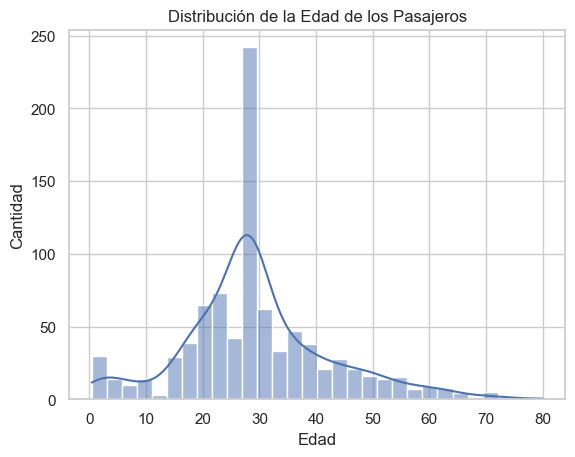

In [13]:
sns.histplot(data=train_df, x='Age', bins=30, kde=True)
plt.title('Distribución de la Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

**Se puede determinar que el rango de edad mayor es de 20 a 40, siendo un numero mayor las personas de 28**

In [21]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

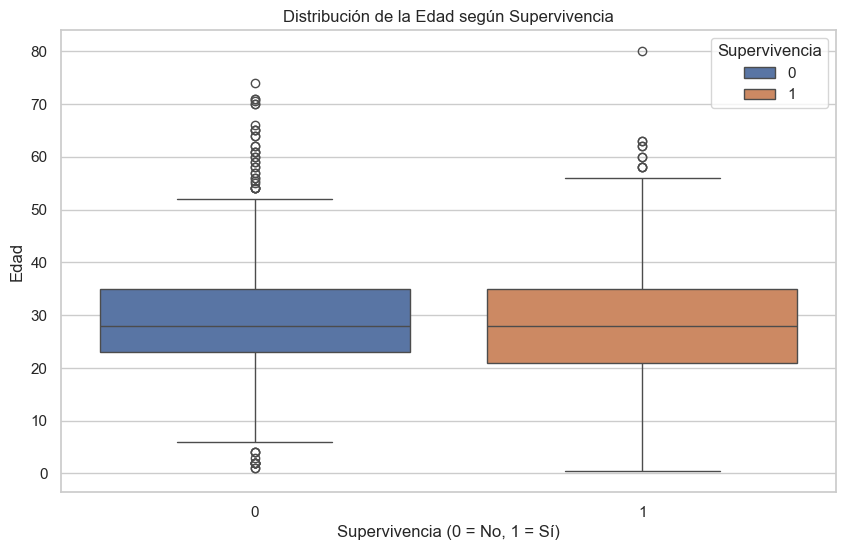

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Survived', y='Age', hue='Survived')
plt.title('Distribución de la Edad según Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.legend(title='Supervivencia', loc='upper right')
plt.show()

## Costo vs Supervivencia

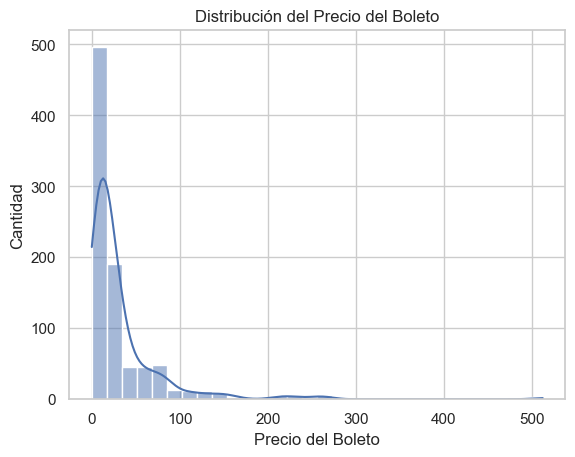

In [25]:
sns.histplot(data=train_df, x='Fare', bins=30, kde=True)
plt.title('Distribución del Precio del Boleto')
plt.xlabel('Precio del Boleto')
plt.ylabel('Cantidad')
plt.show()

In [29]:
train_df['Fare'].value_counts().head(10)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
7.2292     15
26.5500    15
Name: count, dtype: int64

**Se puede apreciar que el costo del boleto que la mayoria compro esta entre 8 a 30 dolare**

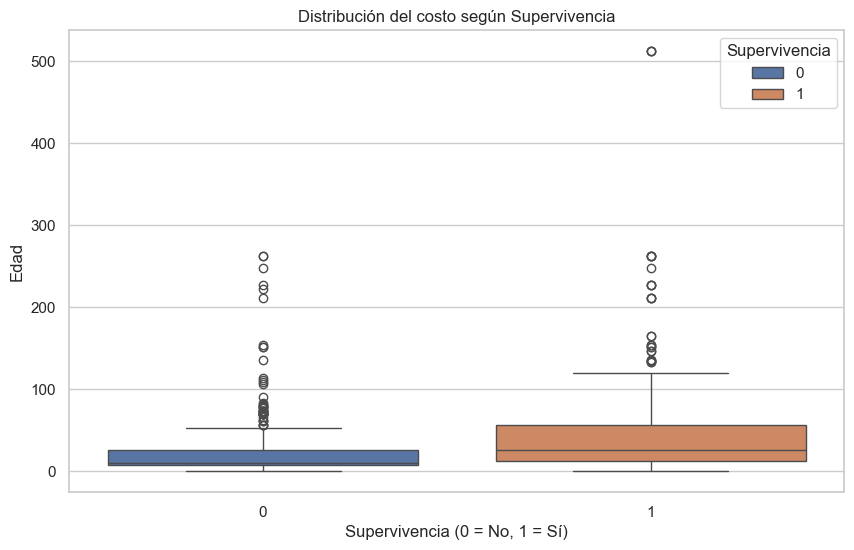

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Survived', y='Fare', hue='Survived')
plt.title('Distribución del costo según Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.legend(title='Supervivencia', loc='upper right')
plt.show()

**Se puede apreciar que el costo del boleto si pudo determinar la supervivencia de los pasajeros considerando que el rango de los precios de lo boleto fue mayor**

In [32]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Size', 'IsAlone'],
      dtype='object')

## Embarques vs Supervivencia

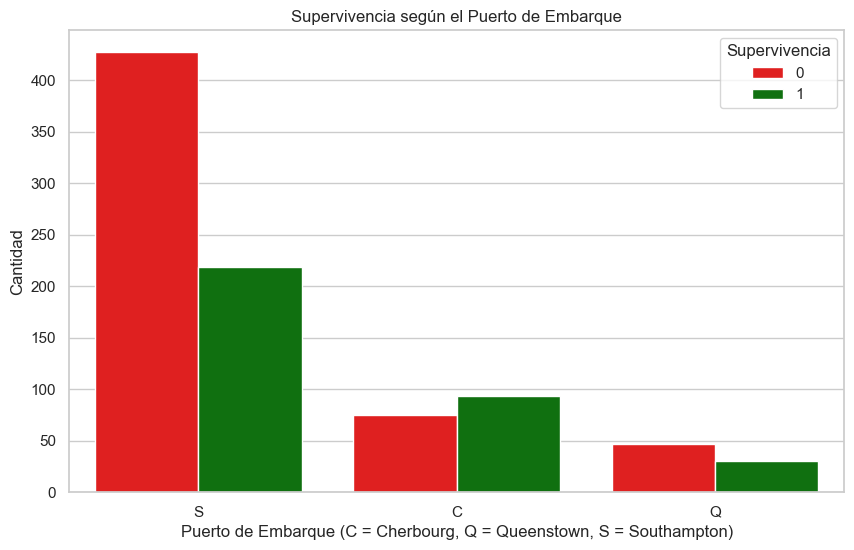

In [33]:
train_df['Embarked'] = train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1).map(lambda x: x[-1])

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Supervivencia según el Puerto de Embarque')
plt.xlabel('Puerto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', loc='upper right')
plt.show()

In [37]:
embarked_survived_counts = train_df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embarked_survived_counts

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


**Podemos determinar facilmente que en el puerto de Cherbourg la supervivencia fue mayor**

## Miembros de la familia vs Supervivencia

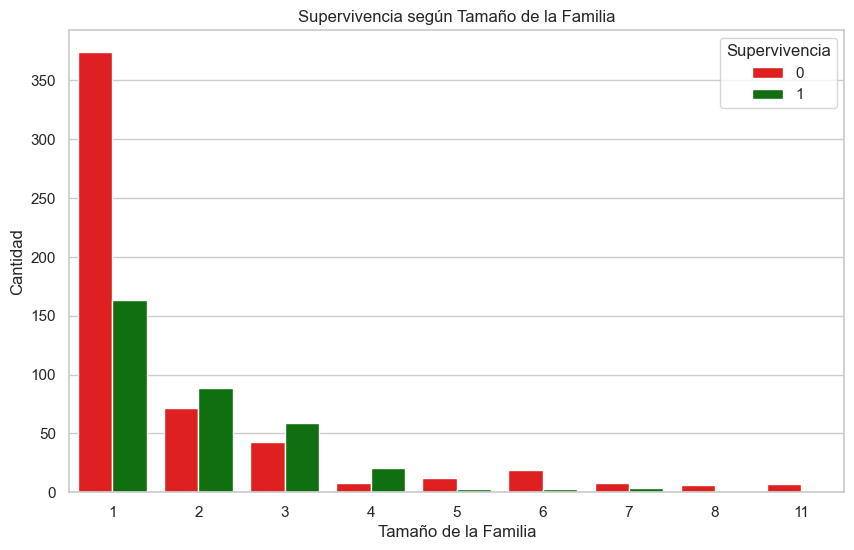

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Family_Size', hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Supervivencia según Tamaño de la Familia')
plt.xlabel('Tamaño de la Familia')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', loc='upper right')
plt.show()


In [40]:
family_survived_counts = train_df.groupby(['Family_Size', 'Survived']).size().unstack(fill_value=0)
family_survived_counts

Survived,0,1
Family_Size,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


**La mayoria eran personas que iban solas, sin embargo se puede determinar de 2 a 4 miembros aumento la supervivencia esto puede ser por la coolaboracion de la familia**

## Soledad vs Supervivencia

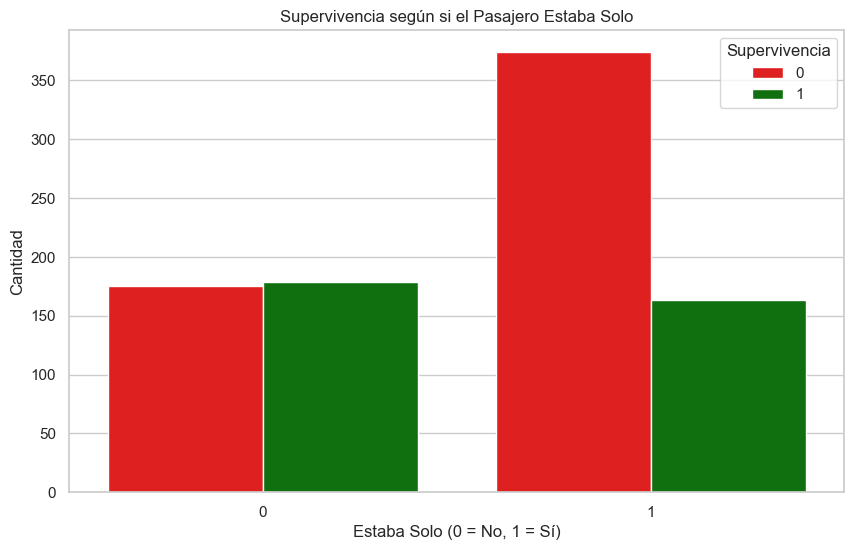

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='IsAlone', hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Supervivencia según si el Pasajero Estaba Solo')
plt.xlabel('Estaba Solo (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', loc='upper right')
plt.show()

**Se puede determinar que estar solo, afectaba bastante en la supervivencia, esto es dificil de determinar debido a todas las situaciones y posibilidades**

# Conclusion

El análisis sugiere que la clase social, el sexo, y el precio del boleto fueron factores significativos en la supervivencia de los pasajeros del Titanic. 

Los pasajeros de primera clase, las mujeres, y aquellos que pagaron boletos más caros tenían más probabilidades de sobrevivir. Además, el puerto de embarque también tuvo un impacto, posiblemente debido a la distribución de clases en los diferentes puertos. Aunque la edad y el tamaño de la familia también jugaron un papel, sus efectos no fueron tan claros o consistentes como los otros factores. 

Estos hallazgos reflejan tanto las normas sociales de la época como las circunstancias específicas del desastre.